# Introduction à l'apprentissage automatique: TP1 - Exercice 1

<br>

Le but de ce premier exercice est de se familiariser avec l'environnement __[Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/)__ et l'utilisation de quelques fonctionnalités de la bibliothèque Python __[scikit-learn](http://scikit-learn.org)__ et de sa __[documentation](https://scikit-learn.org/stable/user_guide.html)__ (utilisez la recherche en haut à droite sur cette dernière page). Tous les modèles d'apprentissage de scikit-learn s'utilisent selon le même principe: le TP aujourd'hui est représentatif de notre travail dans les prochaines séances.

Nous allons nous intéresser à un problème de régression linéaire sous l'angle de l'apprentissage automatique. Rappelons que les problèmes de régression font partie de l'apprentissage supervisé. Vous avez étudié la régression linéaire en cours d'analyse de données, nous introduisons à présent la notion de régularisation qui interviendra à plusieurs reprises dans la suite de ce cours.

<br>

Exécutez les cellules de ce carnet Jupyter les unes après les autres.
En cas de problème d'exécution du code Python, vous pouvez redémarrer le noyau / kernel (onglet `Noyau` ou `Kernel` dans la barre du carnet Jupyter en haut).
Pour ajouter vos commentaires personnels, créez une nouvelle cellule (onglet `Insert`) de type Markdown (à sélectionner dans le menu déroulant en haut du carnet). Un aide-mémoire pour Markdown est disponible __[ici](https://www.ibm.com/support/knowledgecenter/en/SSGNPV_2.0.0/dsx/markd-jupyter.html)__. Vous pouvez aussi examiner le code source des cellules de cette page en "double cliquant".  Nous vous encourageons à écrire vos commentaires en couleur, comme dans l'exemple de la cellule suivante.



## 1. On commence par charger les bibliothèques utiles

In [45]:
# import des bibliothèques Python utiles:
import numpy as np
import sklearn.linear_model as lm
import sklearn.metrics as metrics 
import sklearn.preprocessing as preprocessing 
import matplotlib.pyplot as plt


# "magic function" Jupyter pour l'affichage des graphiques dans le carnet de manière interactive (zoom possible par exemple):
# (voir plus loin)
# si on veut supprimer les interactions (si elles ralentissent trop l'affichage par exemple, ou si elles ne fonctionnent pas), il faut faire:
%matplotlib inline

## 2. Données: distance de freinage en fonction de la vitesse d'un véhicule

<br>

L'objectif de cet exercice est de prédire la distance d'arrêt d'un véhicule en fonction de sa vitesse, dans une approche "basée données".

Commencez par sauvegarder le fichier `freinage.txt` dans votre espace de travail, dans le même dossier que ce carnet.

Dans la cellule ci-dessous, on charge les données (les _observations_ ): `Y_data` représente la distance de freinage d'un véhicule en fonction de la vitesse `X_data` du véhicule.

__Remarque__: pour des raisons pédagogiques, il s'agit de données générées selon un modèle physique, et pas de données expérimentales réelles.

Les observations :

[[ 97.39210623  68.40265235]
 [102.37001465  73.18279578]
 [ 74.22430683  41.77121272]
 [ 57.86009977  26.79057677]
 [ 66.64263809  39.21354566]
 [103.99195364  70.04452718]
 [ 48.62254968  24.22995521]
 [ 97.16166725  71.73825128]
 [ 65.46527119  34.01846326]
 [ 98.30874723  55.46459382]
 [ 28.02247585  10.18583237]
 [ 70.66690962  34.94385292]
 [104.56163601  58.63600465]
 [ 21.74025549   6.66360452]
 [ 54.97669354  22.91731712]
 [ 15.06450867   5.65087206]
 [ 71.64988523  50.57222458]
 [ 98.55408157  73.79708459]
 [ 57.26668905  16.73297295]
 [ 92.49242111  49.98584612]]

nombre d'observations : 20


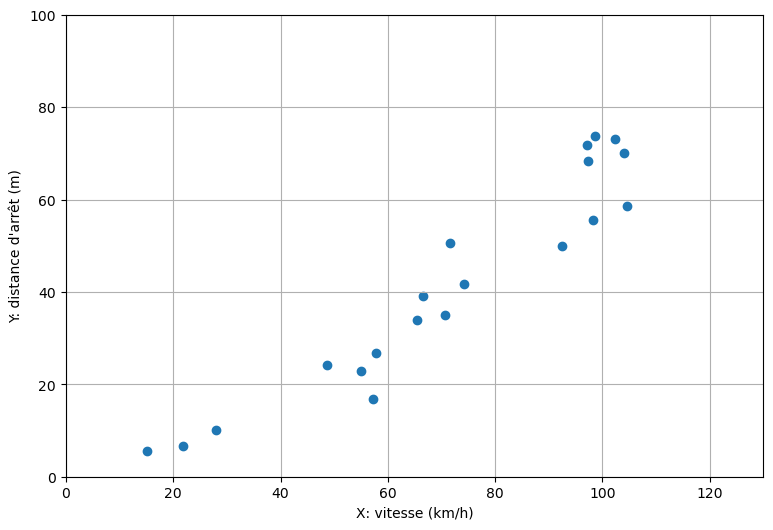

In [46]:
data = np.loadtxt('freinage.txt')  # on lit les données dans un fichier txt
print("Les observations :\n")
print(data)

# les modules sklearn demandent que les données soient représentées par des vecteurs colonnes
X_data = data[:,0].reshape(len(data),1)  # première colonne (sans reshape, X_data serait un vecteur ligne)
Y_data = data[:,1].reshape(len(data),1)  # deuxième colonne
print("\nnombre d'observations : %d" %len(X_data))

# représentation graphique
plt.figure(figsize=(9,6))
plt.scatter(X_data, Y_data)
plt.xlabel("X: vitesse (km/h)")
plt.ylabel("Y: distance d'arrêt (m)")
plt.grid()
plt.xlim(0, 130)
plt.ylim(0, 100)
plt.show()

<br>

Nous allons à présent créer des modèles permettant de prédire les valeurs $y$ correspondant à des valeurs de $x$ entre 0 et 130 km/h. Ces modèles basés sur les données seront créés à partir des 20 valeurs $(x_{data},y_{data})$. 

<br> 

## 3. Régression linéaire (rappel)

Nous commençons par un modèle de régression linéaire. Cela consiste à prédire les valeurs de $y$ par une fonction affine de $x$:
$$ y_{pred} = a_0 + a_1 x$$

Les valeurs de $a_0$ et $a_1$ sont estimées par la méthode des moindres carrés: on cherche les paramètres $a_0$ et $a_1$ qui minimisent
$$\sum_{i=1}^n \bigl( y_{data}[i] - a_0 - a_1 x_{data}[i]\bigr)^2$$
sur l'ensemble des $n=20$ observations $(x_{data}[i],y_{data}[i])_{1\leq i\leq n}$.

In [47]:
# On crée un objet scikit-learn pour la régression linéaire:
lr = lm.LinearRegression()
# lorsqu'on crée un objet scikit-learn, on dispose de méthodes et attributs 
# voir les détails dans la documentation de LinearRegression: on ne se servira que de quelques uns d'entre eux

# On estime les paramètres a_0 et a_1 à l'aide de la méthode fit: 
# (remarque: sklearn attend des données sous forme de vecteurs colonnes)
lr.fit(X_data, Y_data)  
# de manière générale, la méthode fit permet l'apprentissage des paramètres du modèle 
# (ici, estimation par la méthodes des moindres carrés)
# Les paramètres sont stockés dans les attributs suivants de l'objet lr:
print(lr.intercept_)  
print(lr.coef_)

[-13.9567212]
[[0.78069331]]


__Question 1__. Quelles sont les valeurs de $a_0$ et $a_1$ ? (voir la [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html))

a0 = -13.9567212
a1 = 0.78069331

La cellule suivante représente graphiquement la prédiction par régression linéaire.

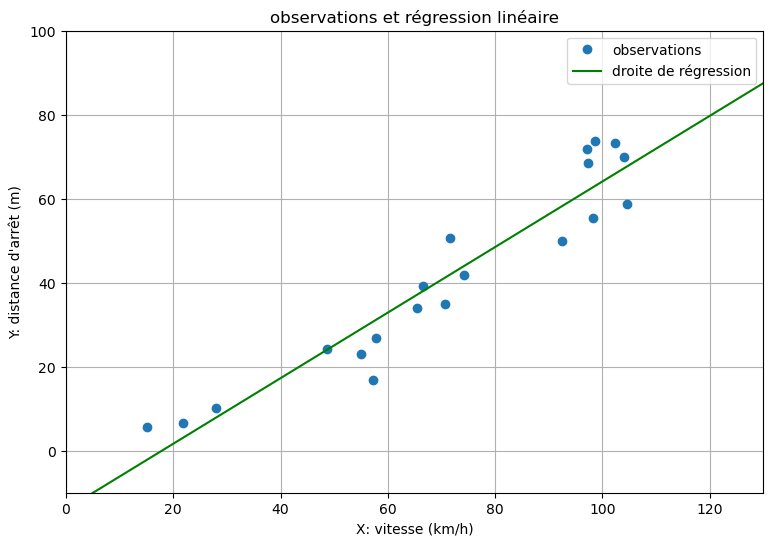

In [48]:
#%%
# On "prédit" les valeurs de y pour 30 valeurs de x réparties régulièrement entre 0 et 130:
X = np.linspace(0,130,num=30).reshape(30,1)
Y_pred_lr = lr.predict(X)  
# la méthode predict permet de prédire les valeurs y pour les valeurs de x passées en argument
# (à l'aide du modèle lr défini précédemment)

# %% 

# représentation graphique
plt.figure(figsize=(9,6))
plt.plot(X_data, Y_data,'o')
plt.plot(X, Y_pred_lr, '-g')
plt.xlim(0, 130)
plt.ylim(-10, 100)
plt.xlabel("X: vitesse (km/h)")
plt.ylabel("Y: distance d'arrêt (m)")
plt.grid()
plt.title('observations et régression linéaire')
plt.legend(["observations","droite de régression"])
plt.show()

Comme on le voit, la droite de régression passe globalement entre les observations. 

__Question 2__. Ce modèle vous semble-t-il réaliste?

<font color='red'>

Non, car il y a bcp de erreur entre les points.

</font>

La cellule suivante permet d'afficher l'erreur quadratique moyenne de prédiction sur les observations. 

__Question 3__. Comment cet indicateur est-il défini? (cherchez dans la documentation)

In [49]:
print("régression linéaire: MSE = "+str(metrics.mean_squared_error(Y_data,lr.predict(X_data))))

régression linéaire: MSE = 48.97063653263491


<font color='red'>

Le indicateur MSE represente le sqrt(echart types) de donnes:

- Sous apprentisage : underfit 
- Sur apprentisage : overfitting

Donc, le modele suivant est en underfit. Pourtant, on dois de aumenté sa complexite, sons modele.

</font>

<br>

Nous allons à présent construire des modèles prédictifs polynomiaux:
$$ y_{pred} = a_0 + \sum_{j=1}^d a_j x^j$$
pour des entiers $d>1$. On se limitera à deux modèles: $d=2$ et $d=6$.

Autrement dit, on prédit la distance d'arrêt comme une fonction polynomiale de la vitesse.

Les coefficients $a_0, \dots, a_d$ sont toujours estimés par la méthode des moindres carrés.

Pour ce faire, on utilise une régression linéaire _multivariée_ comme dans le cours d'analyse de données: au lieu d'utiliser comme régresseur la seule variable $x$, on utilise également les variables $x^2, x^3,\dots, x^d$. Tout se passe comme si la $i$-ème observation est le vecteur $x[i],x[i]^2,x[i]^3,\dots, x[i]^d$.

In [50]:
# création des vecteurs "puissance"
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2,include_bias=False)  # degré 2
X_data2 = poly2.fit_transform(X_data)
poly6 = PolynomialFeatures(degree=6,include_bias=False)  # degré 6
X_data6 = poly6.fit_transform(X_data)
print("les cinq premières observations dans X_data6: \n(les colonnes contiennent les puissances successives de la première)")
print(X_data6[:5,:])

# modèle polynomial avec d=2
lrp2 = lm.LinearRegression()
lrp2.fit(X_data2,Y_data)
print("\nrégression polynomiale degré 2")
print(lrp2.intercept_)
print(lrp2.coef_)

# modèle polynomial avec d=6
lrp6 = lm.LinearRegression()
lrp6.fit(X_data6,Y_data)
print("\nrégresion polynomiale degré 6")
print(lrp6.intercept_)
print(lrp6.coef_)

les cinq premières observations dans X_data6: 
(les colonnes contiennent les puissances successives de la première)
[[9.73921062e+01 9.48522236e+03 9.23785783e+05 8.99694431e+07
  8.76231356e+09 8.53380173e+11]
 [1.02370015e+02 1.04796199e+04 1.07279884e+06 1.09822433e+08
  1.12425241e+10 1.15089736e+12]
 [7.42243068e+01 5.50924773e+03 4.08920094e+05 3.03518105e+07
  2.25284210e+09 1.67215643e+11]
 [5.78600998e+01 3.34779115e+03 1.93703530e+05 1.12077056e+07
  6.48478962e+08 3.75210574e+10]
 [6.66426381e+01 4.44124121e+03 2.95976031e+05 1.97246235e+07
  1.31450094e+09 8.76018107e+10]]

régression polynomiale degré 2
[-1.00876573]
[[0.27821713 0.00391707]]

régresion polynomiale degré 6
[-85.04978809]
[[ 1.35605826e+01 -7.53136575e-01  2.03581784e-02 -2.81763263e-04
   1.94934280e-06 -5.34805965e-09]]


__Question 4__. Comment s'écrivent les deux modèles de prédiction de $y$ en fonction de $x$? (ne reportez que quelques chiffres significatifs)

<font color='red'>

f(x) = -85.04978809 + 1.35x¹ -7.53136575e-01x² + 2.035x³ -2.81x^4 + 1.94x^5 -5.34x^6

    
</font>

La représentation graphique des différents modèle est donnée par la cellule suivante.

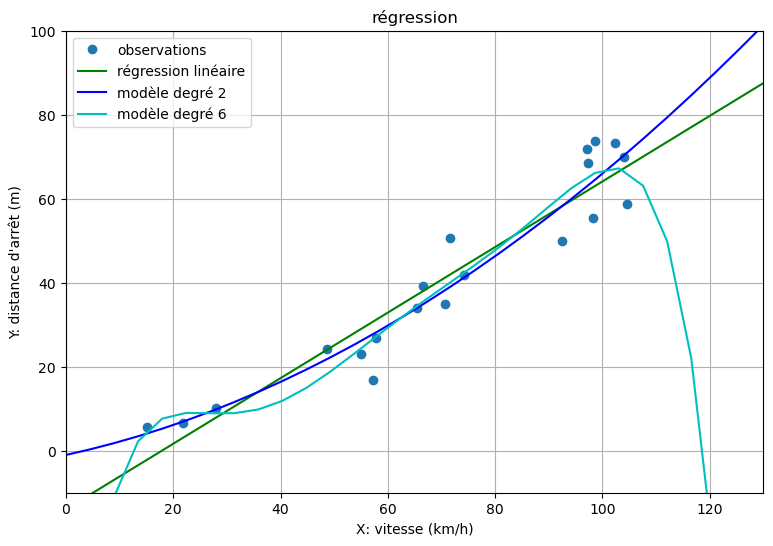

In [51]:
# prédiction des deux modèles sur les valeurs X définies plus haut, pour faire le graphique
X2=poly2.fit_transform(X)
X6=poly6.fit_transform(X)
Y_pred_lrp2=lrp2.predict(X2)  
Y_pred_lrp6=lrp6.predict(X6)

plt.figure(figsize=(9,6))
plt.plot(X_data, Y_data,'o')
plt.plot(X, Y_pred_lr, '-g')
plt.plot(X, Y_pred_lrp2, '-b')
plt.plot(X, Y_pred_lrp6, '-c')
plt.xlim(0, 130)
plt.ylim(-10, 100)
plt.xlabel("X: vitesse (km/h)")
plt.ylabel("Y: distance d'arrêt (m)")
plt.grid()
plt.title('régression')
plt.legend(["observations","régression linéaire","modèle degré 2","modèle degré 6"])
plt.show()

__Question 5.__ Comment interprêter ces résultats, ainsi que les calculs de MSE ci-dessous, dans le vocabulaire de l'apprentissage automatique?

In [52]:
print("régression linéaire: MSE = %.3f" %metrics.mean_squared_error(Y_data,lr.predict(X_data)))

print("régression polynomiale degré 2, MSE = %.3f" %metrics.mean_squared_error(Y_data,lrp2.predict(X_data2)))

print("régression polynomiale degré 6, MSE = %.3f" %metrics.mean_squared_error(Y_data,lrp6.predict(X_data6)))


régression linéaire: MSE = 48.971
régression polynomiale degré 2, MSE = 40.607
régression polynomiale degré 6, MSE = 36.589


<font color='red'>
    
Modele de degré 2 est underfitt.

Modele de degré 6 est meilleur, mas pas forcement le meilleur.
    
</font>    

## 4. Régression _ridge_

Une manière classique de contrer le surapprentissage est de contraindre les paramètres du modèle prédictif à prendre des valeurs "pas trop grandes" (on dit qu'on _régularise_ le modèle).

Dans le cadre de la régression, au lieu d'estimer les paramètres $a_i$ par minimisation des moindres carrés, on peut chercher à minimiser:
$$\sum_{i=1}^n \left(y_{data}[i] - a_0 - \sum_{j=1}^d a_j x_{data}[i]^j\right)^2 + \alpha \sum_{j=1}^d a_j^2$$
où $\alpha$ est un paramètre positif, fixé _a priori_ par l'utilisateur (on parle d'_hyperparamètre_ car $\alpha$ ne fait pas partie des paramètres estimés par minimisation de la fonction précédente).

On voit apparaître un compromis entre l'adéquation aux données (mesurée par la MSE, premier terme de l'expression) et la valeur des paramètres $a_j$ (qui interviennent par le carré de la norme euclidienne du vecteur $(a_1,\dots,a_d) $). On remarque que la régression linéaire classique correspond au cas particulier $\alpha=0$.

Rappelons deux points discutés dans le polycopié:
- le paramètre $a_0$ n'est pas inclus dans la régularisation;
- comme les paramètres $a_1,\dots, a_j$ ont le même poids dans la régularisation, il vaut mieux normaliser les caractéristiques (les composantes des observations) de manière à ce qu'elles varient dans le même intervalle. Dans le cas contraire, la régularisation n'aurait pas le même effet sur chaque caractéristique.

Cette méthode est la régression _ridge_.

<br>


Dans un premier temps, on normalise les observations en divisant chaque vecteur de caractéristique par son écart-type empirique.


In [53]:
# on définit un objet "scaler6" sur les  données de X_data6
scaler6 = preprocessing.StandardScaler(with_mean=False).fit(X_data6)

# les coefficients suivants sont les quantités par lesquelles sont divisées les 6 caractéristiques:
print(scaler6.scale_)

# on constate que ces coefficients sont bien l'écart-type de la caractéristique:
print(np.std(X_data6,axis=0))

# la procédure suivante permet de normaliser les caractéristiques de X_data6 et X6 en les divisant par leur écart-type: 
X_data6_n = scaler6.transform(X_data6)
X6_n = scaler6.transform(X6)

# remarquons que l'on ne normalise pas les Y

[2.75009336e+01 3.60420929e+03 4.05039273e+05 4.34981091e+07
 4.57366345e+09 4.75484966e+11]
[2.75009336e+01 3.60420929e+03 4.05039273e+05 4.34981091e+07
 4.57366345e+09 4.75484966e+11]


Nous allons estimer les paramètres $a'_j$ de modèles de régression sur les données normalisées (où la $j$-ème caractéristique du dataset de départ est divisée par $\sigma_j$). Si $x$ est une vitesse en km/h, il faut donc diviser $x^j$ par $\sigma_j$ pour prédire la distance d'arrêt, selon:
$$ y_{pred} = a'_0 + \sum_{j=1}^d a'_j \frac{x^j}{\sigma_j}$$

La prédiction s'exprime donc en fonction de la vitesse en km/h de la manière suivante:
$$ y_{pred} = a_0 + \sum_{j=1}^d a_j x^j$$
où $a_0=a'_0$, et $\;\forall 1\leqslant j \leqslant d, \, a_j=a'_j/\sigma_j$.

Dans la suite, ce sont ces coefficients $a_j$ que l'on affichera pour pouvoir comparer aux coefficients obtenus avec la régression simple (section 3).

<br>

L'influence du paramètre $\alpha$ est illustrée par la cellule suivante, dans le cas de la régression polynomiale de degré 6: on effectue des regressions ridges pour différentes valeurs de $\alpha$. 

Notez que vous retrouvez bien les valeurs de la régression linéaire classique pour $\alpha=0$.

ridge regression alpha=0
[-85.04972228]
[[ 1.35605826e+01 -7.53136486e-01  2.03581742e-02 -2.81763193e-04
   1.94934229e-06 -5.34805832e-09]]

ridge regression alpha=0.1
[1.0860455]
[[ 1.85290487e-01  3.16842036e-03  2.53473875e-05  1.18488498e-07
  -3.58476197e-10 -1.89396252e-11]]

ridge regression alpha=1
[0.23410606]
[[ 3.19476020e-01  1.96199614e-03  1.17000371e-05  5.49995055e-08
   4.79336504e-11 -3.68664850e-12]]

ridge regression alpha=10
[9.70362033]
[[1.94902213e-01 1.21176437e-03 8.55543549e-06 6.31254496e-08
  4.76442959e-10 3.62157248e-12]]

ridge regression alpha=100
[25.03437413]
[[7.79687667e-02 5.75293787e-04 4.84989726e-06 4.28366973e-08
  3.88866643e-10 3.59142447e-12]]

ridge regression alpha=1000
[38.56725751]
[[1.41055879e-02 1.07844666e-04 9.35677403e-07 8.45618848e-09
  7.82107223e-11 7.33705202e-13]]


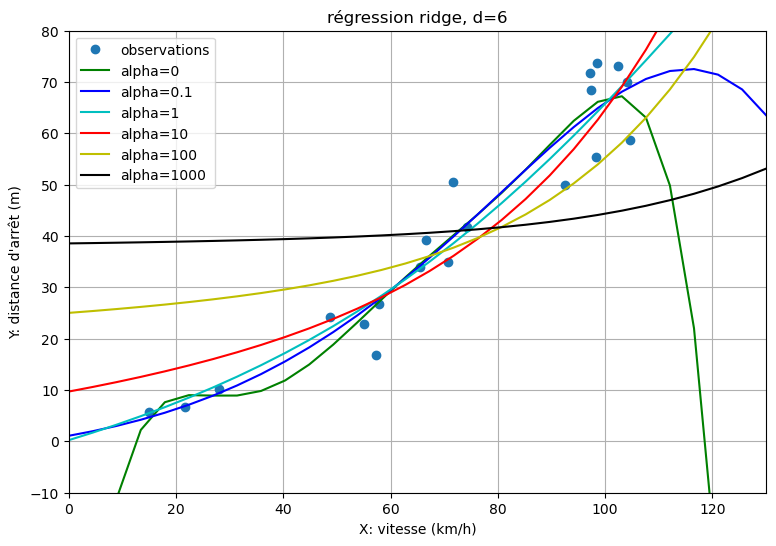

In [54]:
ridgealpha0 = lm.Ridge(alpha=0)
ridgealpha0.fit(X_data6_n,Y_data)
print("ridge regression alpha=0")
print(ridgealpha0.intercept_)
print(ridgealpha0.coef_/scaler6.scale_)  # on affiche bien les a_j, pas les a'_j
Y_pred_ridgealpha0 = ridgealpha0.predict(X6_n)  # on prédit avec les a'_j, donc sur les données normalisées

ridgealpha01 = lm.Ridge(alpha=0.1)
ridgealpha01.fit(X_data6_n,Y_data)
print("\nridge regression alpha=0.1")
print(ridgealpha01.intercept_)
print(ridgealpha01.coef_/scaler6.scale_)
Y_pred_ridgealpha01 = ridgealpha01.predict(X6_n)

ridgealpha1 = lm.Ridge(alpha=1)
ridgealpha1.fit(X_data6_n,Y_data)
print("\nridge regression alpha=1")
print(ridgealpha1.intercept_)
print(ridgealpha1.coef_/scaler6.scale_)
Y_pred_ridgealpha1 = ridgealpha1.predict(X6_n)

ridgealpha10 = lm.Ridge(alpha=10)
ridgealpha10.fit(X_data6_n,Y_data)
print("\nridge regression alpha=10")
print(ridgealpha10.intercept_)
print(ridgealpha10.coef_/scaler6.scale_)
Y_pred_ridgealpha10 = ridgealpha10.predict(X6_n)

ridgealpha100 = lm.Ridge(alpha=100)
ridgealpha100.fit(X_data6_n,Y_data)
print("\nridge regression alpha=100")
print(ridgealpha100.intercept_)
print(ridgealpha100.coef_/scaler6.scale_)
Y_pred_ridgealpha100 = ridgealpha100.predict(X6_n)

ridgealpha1000 = lm.Ridge(alpha=1000)
ridgealpha1000.fit(X_data6_n,Y_data)
print("\nridge regression alpha=1000")
print(ridgealpha1000.intercept_)
print(ridgealpha1000.coef_/scaler6.scale_)
Y_pred_ridgealpha1000 = ridgealpha1000.predict(X6_n)

plt.figure(figsize=(9,6))
plt.plot(X_data, Y_data,'o')
plt.plot(X, Y_pred_ridgealpha0, '-g')
plt.plot(X, Y_pred_ridgealpha01, '-b')
plt.plot(X, Y_pred_ridgealpha1, '-c')
plt.plot(X, Y_pred_ridgealpha10, '-r')
plt.plot(X, Y_pred_ridgealpha100, '-y')
plt.plot(X, Y_pred_ridgealpha1000, '-k')
plt.xlim(0, 130)
plt.ylim(-10, 80)
plt.xlabel("X: vitesse (km/h)")
plt.ylabel("Y: distance d'arrêt (m)")
plt.grid()
plt.title('régression ridge, d=6')
plt.legend(["observations","alpha=0","alpha=0.1","alpha=1","alpha=10","alpha=100","alpha=1000"])
plt.show()

Notez que les coefficients $a_j$ ($1\leq j \leq 6$) diminuent et que $a_0$ tend vers la moyenne des $Y_\text{data}[i]$ lorsque $\alpha$ augmente. 

Il faut maintenant choisir l'hyperparamètre $\alpha$ le plus adapté au problème.

Un _hyperparamètre_ est un paramètre du modèle qui n'est pas déterminé par apprentissage mais qui doit être fixé par l'utilisateur ou de manière à optimiser un critère.

<br>

La méthode `RidgeCV` (à utiliser à la place de `Ridge`) permet de faire une régression ridge en sélectionnant un hyperparamètre par _validation croisée_. **Dans cette question, nous l'utilisons en "boîte noire"**.
Une partie de la prochaine séance sera consacrée à cette méthode de sélection de modèle. 

<br>

On commence par normaliser les datasets pour la régression linéaire et polynomiale de degré 2, comme précédemment pour la régression polynomiale de degré 6.

In [55]:
scaler1 = preprocessing.StandardScaler(with_mean=False).fit(X_data)
X_data_n = scaler1.transform(X_data)
X_n = scaler1.transform(X)

scaler2 = preprocessing.StandardScaler(with_mean=False).fit(X_data2)
X_data2_n = scaler2.transform(X_data2)
X2_n = scaler2.transform(X2)

Par exemple, pour la régression ridge dont la valeur de $\alpha$ est choisie par validation croisée parmi 11 valeurs de la forme $10^{-i}$ avec $i$ prenant 11 valeurs régulièrement espacées entre entre -5 et 5: 

In [56]:
ridge1 = lm.RidgeCV(alphas=np.logspace(-5, 5, 11))
ridge1.fit(X_data_n,Y_data)
print("ridge regression, polynome degré 1")
print(ridge1.intercept_)
print(ridge1.coef_/scaler1.scale_)
print("alpha sélectionné: %.5f" %ridge1.alpha_)

ridge regression, polynome degré 1
[-11.30415785]
[[0.74351744]]
alpha sélectionné: 1.00000


Avec des données normalisées, il est d'usage de chercher $\alpha$ autour de la valeur 1 comme ici. 

<br>

La cellule suivante réalise la régression _ridge_ avec sélection de l'hyperparamètre $\alpha$ par validation croisée, dans les cas $d=1$, $d=2$, et $d=6$. 

In [57]:
ridge1 = lm.RidgeCV(alphas=np.logspace(-5, 5, 11), cv=5)
ridge1.fit(X_data_n,Y_data)
print("ridge regression, polynome degré 1")
print(ridge1.intercept_)
print(ridge1.coef_/scaler1.scale_)
print("alpha sélectionné: %.5f" %ridge1.alpha_)

ridge2 = lm.RidgeCV(alphas=np.logspace(-5, 5, 11), cv=5)
ridge2.fit(X_data2_n,Y_data)
print("\nridge regression, polynome degré 2")
print(ridge2.intercept_)
print(ridge2.coef_/scaler2.scale_)
print("alpha sélectionné: %.5f" %ridge2.alpha_)

ridge6 = lm.RidgeCV(alphas=np.logspace(-5, 5, 11), cv=5)
ridge6.fit(X_data6_n,Y_data)
print("\nridge regression, polynome degré 6")
print(ridge6.intercept_)
print(ridge6.coef_/scaler6.scale_)
print("alpha sélectionné: %.5f" %ridge6.alpha_)

ridge regression, polynome degré 1
[-11.30415785]
[[0.74351744]]
alpha sélectionné: 1.00000

ridge regression, polynome degré 2
[-1.06957543]
[[0.28082538 0.00389565]]
alpha sélectionné: 0.01000

ridge regression, polynome degré 6
[1.0860455]
[[ 1.85290487e-01  3.16842036e-03  2.53473875e-05  1.18488498e-07
  -3.58476197e-10 -1.89396252e-11]]
alpha sélectionné: 0.10000


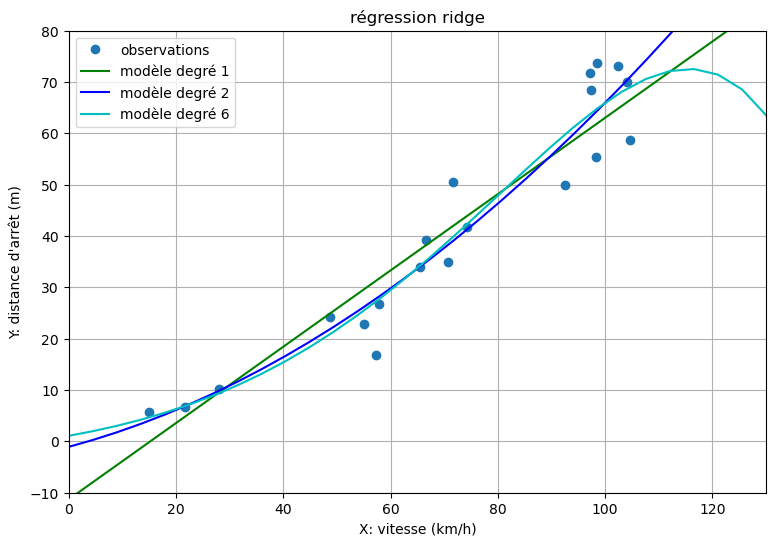

In [58]:
Y_pred_lrr1=ridge1.predict(X_n)
Y_pred_lrr2=ridge2.predict(X2_n)
Y_pred_lrr6=ridge6.predict(X6_n)

plt.figure(figsize=(9,6))
plt.plot(X_data, Y_data,'o')
plt.plot(X, Y_pred_lrr1, '-g')
plt.plot(X, Y_pred_lrr2, '-b')
plt.plot(X, Y_pred_lrr6, '-c')
plt.xlim(0, 130)
plt.ylim(-10, 80)
plt.xlabel("X: vitesse (km/h)")
plt.ylabel("Y: distance d'arrêt (m)")
plt.grid()
plt.title('régression ridge')
plt.legend(["observations","modèle degré 1","modèle degré 2","modèle degré 6"])
plt.show()

In [59]:
print("régression ridge polynomiale degré 1, MSE = %.2f" %metrics.mean_squared_error(Y_data,ridge1.predict(X_data_n)))

print("régression ridge polynomiale degré 2, MSE = %.2f" %metrics.mean_squared_error(Y_data,ridge2.predict(X_data2_n)))

print("régression ridge polynomiale degré 6, MSE = %.2f" %metrics.mean_squared_error(Y_data,ridge6.predict(X_data6_n)))


régression ridge polynomiale degré 1, MSE = 50.02
régression ridge polynomiale degré 2, MSE = 40.61
régression ridge polynomiale degré 6, MSE = 38.10


__Question 6__. Comment évoluent les valeurs des paramètres par rapport à la régression classique? Constatez que la régularisation permet de définir des modèles moins affectés par le sur-apprentisage.

<font color=red>

Bien sur! Les modèles moins affectés par le sur-apprentisage sont les modèles avec moin MSE (Mean squared error).
    
</font>

# 5. Lasso

Expérimentez le _Lasso_ , décrit __[dans la documentation](https://scikit-learn.org/stable/modules/linear_model.html#lasso)__. 

__Question 7__. Quelle est la différence essentielle avec la régression ridge? On utilisera __[LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV)__ qui sélectionne l'hyperparamètre. Comment comprenez-vous la remarque _"As the Lasso regression yields sparse models, it can thus be used to perform feature selection"_ dans la documentation?

_Remarque_ :
observez dans la documentation que la stratégie pour fixer l'hyperparamètre $\alpha$ n'est pas la même que pour `RidgeCV`

<font color=red>

Le Ridge utilise esseyer de maximize un parametre alhpa, par contre le Lasso CV force certains coefficients à devenir exactement nuls.

Le signifique c'est qui, avec de la progression de le modèle, lasso peux selectioner les variables qui ne pas forcement fournir le description exact.
    
</font>

In [60]:
lasso1 = lm.LassoCV()
lasso1.fit(X_data_n,np.ravel(Y_data))  # le lasso attend un 1D array pour y, d'où "np_ravel"
print("lasso regression, fonction affine")
print(lasso1.intercept_)
print(lasso1.coef_/scaler1.scale_)
print("alpha sélectionné: %.5f" %lasso1.alpha_)

lasso2 = lm.LassoCV()
lasso2.fit(X_data2_n,np.ravel(Y_data))  
print("\nlasso regression, polynome degré 2")
print(lasso2.intercept_)
print(lasso2.coef_/scaler2.scale_)
print("alpha sélectionné: %.5f" %lasso2.alpha_)

lasso6 = lm.LassoCV()   
lasso6.fit(X_data6_n,np.ravel(Y_data))
print("\nlasso regression, polynome degré 6")
print(lasso6.intercept_)
print(lasso6.coef_/scaler6.scale_)
print("alpha sélectionné: %.5f" %lasso6.alpha_)

lasso regression, fonction affine
-9.742930705615201
[0.72163673]
alpha sélectionné: 1.62411

lasso regression, polynome degré 2
-0.9942866373024088
[0.27896043 0.00390553]
alpha sélectionné: 0.02161

lasso regression, polynome degré 6
-0.5797014942799024
[ 0.27538057  0.00387831  0.          0.          0.         -0.        ]
alpha sélectionné: 0.21607


__Question 8__. Que dire des coefficients calculés? 

<font color=red>

Qui le qualité de modèle avec 2 ou 6 degré de polynomie (peut-etre plus degre) ne interfere pas, car Lasso peux force les variables a un modèle simples alors que sans interefere dans le resultat final (MSE).
    
</font>

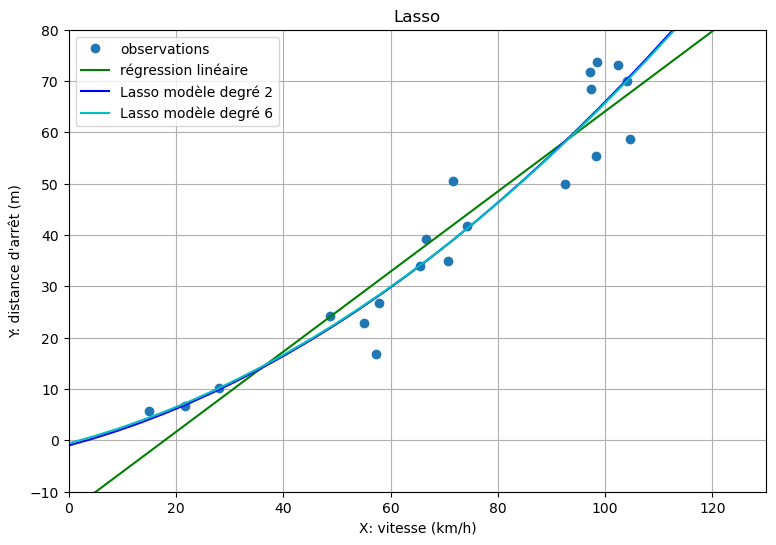

In [61]:
Y_pred_lasso1=lasso1.predict(X_n)
Y_pred_lasso2=lasso2.predict(X2_n)
Y_pred_lasso6=lasso6.predict(X6_n)

plt.figure(figsize=(9,6))
plt.plot(X_data, Y_data,'o')
plt.plot(X, Y_pred_lr, '-g')
plt.plot(X, Y_pred_lasso2, '-b')
plt.plot(X, Y_pred_lasso6, '-c')
plt.xlim(0, 130)
plt.ylim(-10, 80)
plt.xlabel("X: vitesse (km/h)")
plt.ylabel("Y: distance d'arrêt (m)")
plt.grid()
plt.title('Lasso')
plt.legend(["observations","régression linéaire","Lasso modèle degré 2","Lasso modèle degré 6"])
plt.show()

Les physiciens nous apprennent qu'un modèle réaliste de la distance d'arrêt $D$ en fonction de la vitesse initiale $v_0$ est donné par la relation:
$$ D = v_0 t_r + \frac{v_0^2}{2a}$$

où $a$ est la décélération (supposée constante), et $t_r$ le temps de réaction.

Voir cette __[page wikipedia](https://fr.wikipedia.org/wiki/Distance_d%27arr%C3%AAt)__.

Les données de cet exercice ont été générées en supposant un temps de réaction de une seconde et une décélération de $10 m.s^{-2}$, ce qui aboutit à cette équation:
$$Y=X/3.6+(X/3.6)^2/(2*10)$$

Un bruit gaussien d'écart-type grandissant avec X a été ensuite ajouté à Y.

On devrait donc obtenir un modèle de degré 2 avec pour valeurs de paramètres:

In [62]:
print("a_0 = 0")
print("a_1 = %.5f" %(1/3.6))
print("a_2 = %.5f" %(1/(3.6**2*2*10)))

a_0 = 0
a_1 = 0.27778
a_2 = 0.00386


__Question 9__. Comparez aux modèles basés sur les données obtenus précédemment.

<font color='red'>

Le data qui nous obtenons poue le modelè de 6 degré sont: [ 0.27538057  0.00387831  0.          0.          0.         -0.        ], c-a-d, a_1 = 0.27538057 et a_2 = 0.00387831

Sont très parielle les modele theorique qui Newton a postulé et le modelè réel qui nous obtenus avec le data de la realité.



</font>